In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
import cv2
from torchvision import datasets
from torchvision.transforms import ToTensor

im going to use the FashionMNIST dataset from torch for this practice

In [ ]:
#split

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(), # images come as PIL format, turning into tensor
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.88MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image, label = train_data[0]
image.shape #[1, 28, 28], meaning greyscale

torch.Size([1, 28, 28])

In [ ]:
#find labels
types = train_data.classes
for x in range(len(types)):
  print(str(x) + " : " + types[x])

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot


Ankle boot


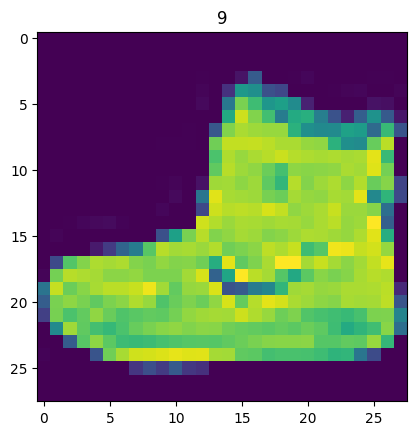

In [ ]:
plt.imshow(image.squeeze()) #rmber rid of empty
plt.title(label)
print(types[label])

In [ ]:
#now into data loading, hmmm kinda conects to ap stat unit 5 (♥O♥ )
#could batches be like the sample size? -
#YES IT ISSSS< OMGGG HOW MANY SAMPLES PER BATCH RIGHHTTTTT SO THIS IS USED< AND ESPECIALLY IN THE GRADIENT DESCENT
#ohhhhh and than normalization is where it can use that statagy to scale down a non normal distribution
#while standardization is for those that are already normalized ooooo this is coollllll
from torch.utils.data import DataLoader
bs = 32 #(normal size) - rmbr what stat teacher said: usually the sample size has to be greater than 30 otherwise it is not considered individual

train_dataloader = DataLoader(train_data,
    batch_size=bs,
    shuffle=True
)
test_dataloader = DataLoader(test_data,
    batch_size=bs,
    shuffle=False # don't need to shuffle the testing data
)


In [ ]:
model = nn.Sequential(
    nn.Flatten(), #turns to vector, input = (28*28)
    nn.Linear(in_features=784, out_features = 20), #input
    nn.ReLU(),
    nn.Linear(in_features=20, out_features = 15),
    nn.ReLU(),#would the activation function relu be best for this??
    nn.Linear(in_features=15, out_features = 10),
    nn.Sigmoid(),
    nn.Linear(in_features= 10, out_features=len(types))

)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = (y_true == y_pred).sum().item()  # Count correctly classified samples
    total = y_true.size(0)  # Total number of samples
    return correct / total * 100
#get loss function and optimizer
loss = nn.CrossEntropyLoss() #how is this the right fit?
opt = torch.optim.SGD(params = model.parameters(), lr = 0.1) #THE GRADIENT DECENT MR SCHEPENS TAUGHTTTTTTTT YASSSS
#(lr) is the learning rate, which is a hyperparameter that controls the size of the steps the model takes during gradient descent.
epochs = 10
for epoch in range(epochs):
  print("epoch " + str(epoch))
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model.train()
    preds = model(X)
    oneloss = loss(preds, y)
    train_loss += oneloss

    opt.zero_grad()  # Reset gradients
    oneloss.backward()  # Backpropagation :D
    opt.step()  # Update weights
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model(X)
      test_loss += loss(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


epoch 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.46928 | Test loss: 0.51683, Test acc: 81.78%

epoch 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.43412 | Test loss: 0.45970, Test acc: 84.15%

epoch 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.40921 | Test loss: 0.43761, Test acc: 85.12%

epoch 3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.39217 | Test loss: 0.41856, Test acc: 85.57%

epoch 4
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/


KeyboardInterrupt

